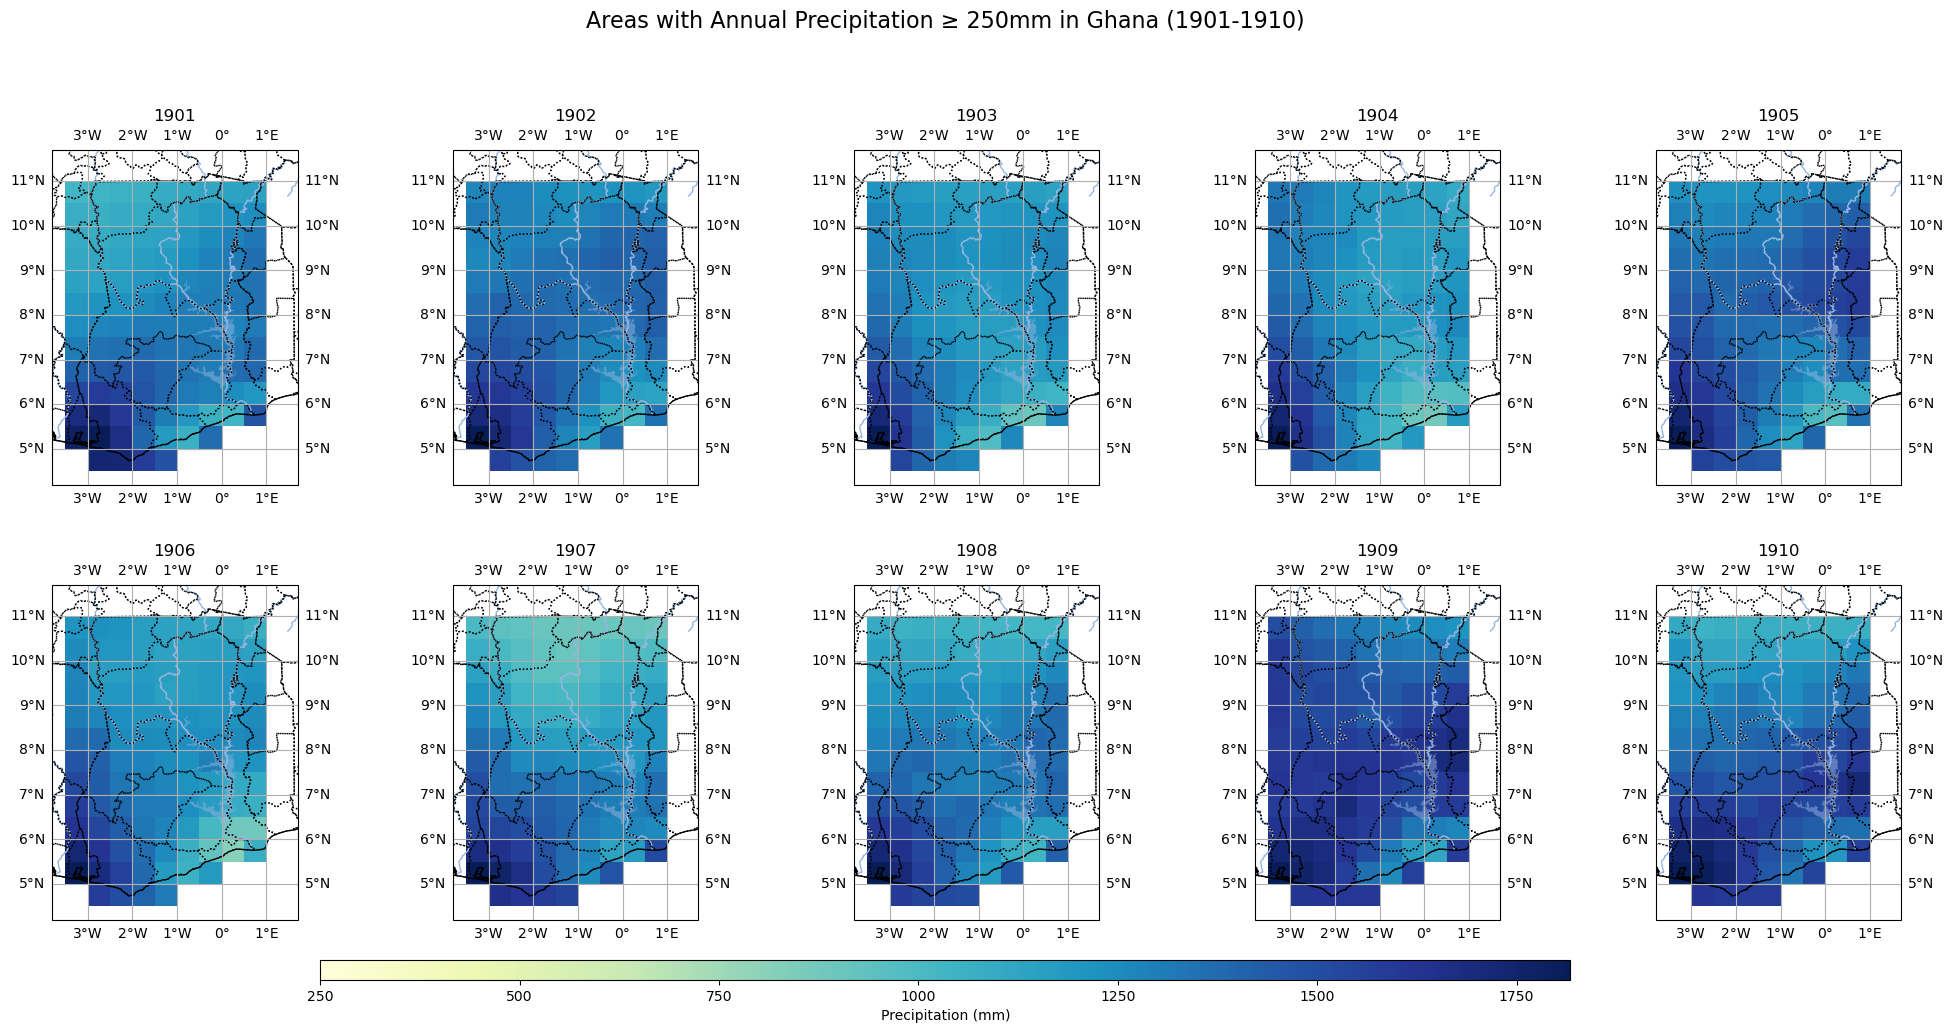

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Load the dataset
file_path = 'Africa_cru_data.nc'
data = xr.open_dataset(file_path)

# Select the precipitation variable (adjust name if needed)
precip = data['pre']  # Change if your variable has different name

# Ghana's boundaries (lon_min, lon_max, lat_min, lat_max)
ghana_bounds = {
    'lon': (-3.3, 1.2),
    'lat': (4.7, 11.2)
}

# Create figure with adjusted spacing parameters
fig = plt.figure(figsize=(25, 10))
fig.suptitle('Areas with Annual Precipitation ≥ 250mm in Ghana (1901-1910)', y=1.02, fontsize=16)

# Create gridspec for better layout control
gs = fig.add_gridspec(2, 5, hspace=0.3, wspace=0.2)

# Loop through each year from 1901 to 1910
for i, year in enumerate(range(1901, 1911)):
    # Create subplot using gridspec
    ax = fig.add_subplot(gs[i//5, i%5], projection=ccrs.PlateCarree())
    
    # Select data for current year and Ghana region
    precip_year = precip.sel(time=str(year))
    precip_ghana = precip_year.sel(
        lon=slice(ghana_bounds['lon'][0], ghana_bounds['lon'][1]),
        lat=slice(ghana_bounds['lat'][0], ghana_bounds['lat'][1])
    )
    
    # Calculate annual precipitation
    annual_precip = precip_ghana.sum(dim='time')
    
    # Mask values where precipitation < 250mm
    masked_precip = annual_precip.where(annual_precip >= 250)
    
    # Create the plot
    img = masked_precip.plot(ax=ax, add_colorbar=False, cmap='YlGnBu', vmin=250)
    
    # Set map extent with small buffer
    ax.set_extent([ghana_bounds['lon'][0]-0.5, ghana_bounds['lon'][1]+0.5, 
                   ghana_bounds['lat'][0]-0.5, ghana_bounds['lat'][1]+0.5])
    
    # Add map features
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(cfeature.STATES, linestyle=':')
    
   
    
    
    ax.set_title(f'{year}')
    ax.gridlines(draw_labels=True)

# Add single colorbar using gridspec
cbar_ax = fig.add_axes([0.25, 0.05, 0.5, 0.02])  # [left, bottom, width, height]
cbar = plt.colorbar(img, cax=cbar_ax, orientation='horizontal', label='Precipitation (mm)')
cbar.set_ticks(np.arange(250, masked_precip.max(), 250))

plt.show()

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

In [3]:
# Load the dataset
file_path = 'Africa_cru_data.nc'
data = xr.open_dataset(file_path)

In [4]:
data

<xarray.Dataset>
Dimensions:  (lon: 150, lat: 146, time: 1440)
Coordinates:
  * lon      (lon) float32 -19.75 -19.25 -18.75 -18.25 ... 53.75 54.25 54.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16
Data variables:
    pre      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.05 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2103051243. Data generated from:pre.2103041709.dtb
    history:      Fri  5 Mar 14:41:58 GMT 2021 : User harry : Program makegri...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [5]:
# Select the precipitation variable (adjust name if needed)
precip = data['pre']  # Change if your variable has different name

In [6]:
# Ghana's boundaries (lon_min, lon_max, lat_min, lat_max)
ghana_bounds = {'lon': (-3.3, 1.2),'lat': (4.7, 11.2)}

In [7]:
# Create figure with adjusted spacing parameters
fig = plt.figure(figsize=(25, 10))
fig.suptitle('Areas with Annual Precipitation ≥ 250mm in Ghana (1901-1910)', y=1.02, fontsize=16)

Text(0.5, 1.02, 'Areas with Annual Precipitation ≥ 250mm in Ghana (1901-1910)')

<Figure size 2500x1000 with 0 Axes>

In [8]:
# Create gridspec for better layout control
gs = fig.add_gridspec(2, 5, hspace=0.3, wspace=0.2)

In [9]:
# Loop through each year from 1901 to 1910
for i, year in enumerate(range(1901, 1911)):
    # Create subplot using gridspec
    ax = fig.add_subplot(gs[i//5, i%5], projection=ccrs.PlateCarree())

In [10]:
 # Select data for current year and Ghana region
precip_year = precip.sel(time=str(year))
precip_ghana = precip_year.sel(lon=slice(ghana_bounds['lon'][0], ghana_bounds['lon'][1]),lat=slice(ghana_bounds['lat'][0], ghana_bounds['lat'][1]))

In [11]:
 # Calculate annual precipitation
annual_precip = precip_ghana.sum(dim='time')

In [12]:
 # Mask values where precipitation < 250mm
masked_precip = annual_precip.where(annual_precip >= 250)

In [13]:
 # Create the plot
img = masked_precip.plot(ax=ax, add_colorbar=False, cmap='YlGnBu', vmin=250)

In [14]:
# Set map extent with small buffer
ax.set_extent([ghana_bounds['lon'][0]-0.5, ghana_bounds['lon'][1]+0.5, ghana_bounds['lat'][0]-0.5, ghana_bounds['lat'][1]+0.5])

In [15]:
# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.STATES, linestyle=':')
ax.set_title(f'{year}')
ax.gridlines(draw_labels=True)
# Add single colorbar using gridspec
cbar_ax = fig.add_axes([0.25, 0.05, 0.5, 0.02])  # [left, bottom, width, height]
cbar = plt.colorbar(img, cax=cbar_ax, orientation='horizontal', label='Precipitation (mm)')
cbar.set_ticks(np.arange(250, masked_precip.max(), 250))

plt.show()

<Figure size 640x480 with 0 Axes>